# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pd.__version__

'1.3.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [8]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [9]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [250]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [11]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [12]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [13]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [14]:
len(movies)

244914

### List all Batman movies ever made

In [15]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [16]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [17]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [20]:
potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
potter_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [21]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [23]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [30]:
len((movies[(movies.year >= 2000) | (movies.year <= 2018)]))

244914

### Section I - Q4: How many movies are titled "Hamlet"?

In [31]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
print('Total Hamlet Movies:', len(batman_df))

Total Hamlet Movies: 35


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [37]:
hamlet = hamlet_df[hamlet_df.year >= 2000]
print(hamlet.sort_values(by=['year'], ascending=True))

                                          title  year
55639                                    Hamlet  2000
55525                    Hamlet in the Hamptons  2002
137905                                 Hamlet_X  2003
218468                                 Hamlet X  2004
40045                               Hamlet (II)  2005
152920          Dogg's Hamlet, Cahoot's Macbeth  2005
200246  The Tragedy of Hamlet Prince of Denmark  2007
176528                              Hamlet (II)  2007
156899                             Hamlet (III)  2007
52408                 Hamlet the Vampire Slayer  2008
141237                                 Hamlet 2  2008
191734                           Kitchen Hamlet  2009
1931                                     Hamlet  2009
227953                                   Hamlet  2011
220674                     Hamlet Demonstration  2011
51236                            Hamlet Unbound  2012
17833                             Zombie Hamlet  2012
186136                      

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [43]:
inception_support = cast[(cast.title == 'Inception') & (cast.n.isnull())]
print(len(inception_support))

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [45]:
inception_df = cast[(cast.title == 'Inception') & ~(cast.n.isnull())]
print(len(inception_df))

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [49]:
inception_top10 = cast[(cast.title == 'Inception')].sort_values(by=['n'], ascending=False)
print(inception_top10.head(10))

             title  year                name     type              character  \
3731263  Inception  2010      Shannon Welles  actress                Old Mal   
833376   Inception  2010         Jack Gilroy    actor               Old Cobb   
2250605  Inception  2010       Jason Tendell    actor       Fischer's Driver   
3473041  Inception  2010  Lisa (II) Reynolds  actress          Private Nurse   
1812091  Inception  2010      Andrew Pleavin    actor            Businessman   
2049179  Inception  2010         Felix Scott    actor            Businessman   
807795   Inception  2010      Michael Gaston    actor    Immigration Officer   
149008   Inception  2010        Peter Basham    actor  Fischer's Jet Captain   
3444628  Inception  2010      Nicole Pulliam  actress          Lobby Sub Con   
3203564  Inception  2010   Alex (II) Lombard  actress          Lobby Sub Con   

            n  
3731263  51.0  
833376   50.0  
2250605  49.0  
3473041  48.0  
1812091  47.0  
2049179  46.0  
807795 

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [51]:
albus = cast[(cast.character == 'Albus Dumbledore')]
print(albus.title)


704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object


In [53]:
albus_actor = albus.name
print(albus_actor)

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [254]:
keanu = cast[(cast.name == 'Keanu Reeves')]
print(len(keanu))

mckell = cast[(cast.name == 'Ian McKellen')]
print(len(mckell))

62
52


In [141]:
keanu = cast[(cast.name == 'Keanu Reeves')].sort_values(by=['n'], ascending=False)
print(keanu)

                          title  year          name   type          character  \
1892391     The Matrix Reloaded  2003  Keanu Reeves  actor                Neo   
1892370             Me and Will  1999  Keanu Reeves  actor            Himself   
1892369             Me and Will  1999  Keanu Reeves  actor            Dogstar   
1892392  The Matrix Revolutions  2003  Keanu Reeves  actor                Neo   
1892365                   Keanu  2016  Keanu Reeves  actor              Keanu   
...                         ...   ...           ...    ...                ...   
1892342                47 Ronin  2013  Keanu Reeves  actor                Kai   
1892356                 Freaked  1993  Keanu Reeves  actor  Ortiz the Dog Boy   
1892357        Generation Um...  2012  Keanu Reeves  actor               John   
1892363    John Wick: Chapter 3  2019  Keanu Reeves  actor          John Wick   
1892381                  SPF-18  2017  Keanu Reeves  actor       Keanu Reeves   

            n  
1892391  59

In [163]:
# This dataset doesn't make any sense, the n rankings don't seem right as in Matrix Reloaded Keanu is not the most important n value????
# print(keanu2)
# for index, row in keanu.iterrows():
# #     print(row)
#     top = cast[(row['title'] == cast.title) & ~pd.isnull(row['n'])].sort_values(by=['n'], ascending=False).head(1)
#     print(top)
print(len(keanu[~pd.isnull(keanu.n)]))
#     if top.name.bool() != "Keanu Reeves":
# #         keanu2 = keanu2.drop(keanu2[keanu2.title == row['title']].index)
#         keanu2.drop(index)

58


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [164]:
print(len(cast[(cast.year>=1950) & (cast.year <= 1960)]))

234635


In [165]:
print(len(cast[(cast.year>=2007) & (cast.year <= 2017)]))

1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [166]:
print(len(cast[(cast.year>=2000)]))

1949762


In [169]:
print(len(cast[(cast.year>=2000) & (pd.isnull(cast.n)) & ~(cast.character.str.contains('support', case=False))]))

886344


In [170]:
print(len(cast[(cast.year>=2000) & (pd.isnull(cast.n))]))

887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [171]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

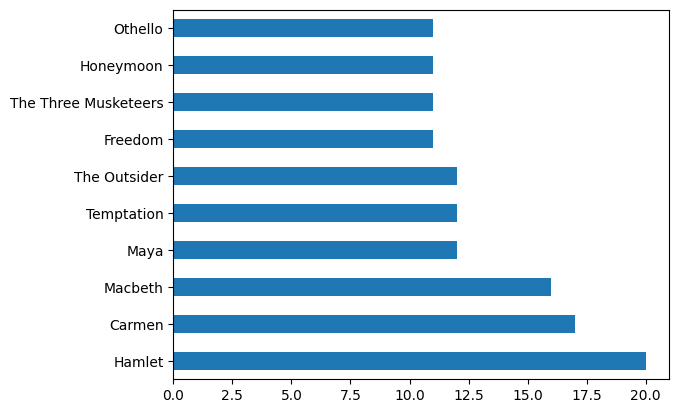

In [172]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [173]:
movies.year.value_counts()[:3]

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

1894    1
1898    1
1899    1
1900    5
1903    1
       ..
2023    5
2024    6
2025    1
2026    1
2115    1
Name: year, Length: 128, dtype: int64
1890        3
1900       39
1910     6799
1920     9034
1930    10388
1940     8718
1950    12934
1960    17976
1970    19526
1980    21034
1990    22992
2000    39452
2010    75733
2020      285
2110        1
Name: year, dtype: int64


<AxesSubplot:>

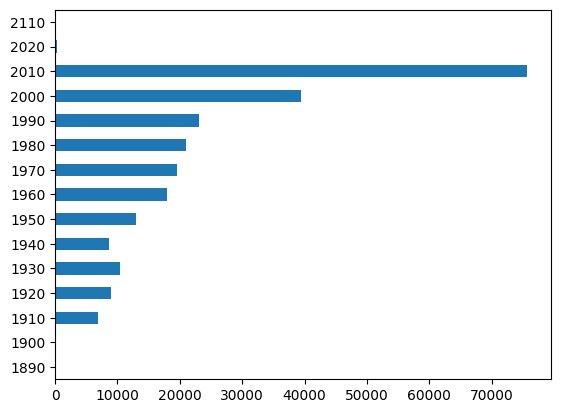

In [192]:
temp = movies.year.value_counts().sort_index(ascending=True)
print(temp)

df = temp.groupby((temp.index//10)*10).sum()
print(df)
df.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [195]:
top_ten = cast.character.value_counts()[:10]
print(top_ten)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64


In [198]:
top_ten = cast[cast.character == "Herself"].name.value_counts()[:10]
print(top_ten)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64


In [199]:
top_ten = cast[cast.character == "Himself"].name.value_counts()[:10]
print(top_ten)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [204]:
cast[cast.character.str.startswith("Zombie")].character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [ ]:
cast[cast.character.str.startswith("Police")].character.value_counts()[:10]

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: year, dtype: int64


<AxesSubplot:>

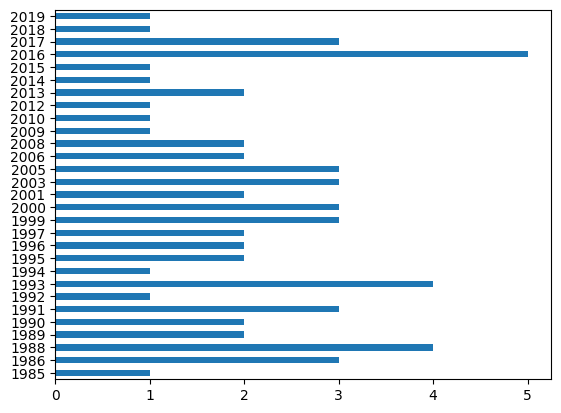

In [207]:
keanuRoles = cast[cast.name == "Keanu Reeves"].year.value_counts().sort_index(ascending=True)
print(keanuRoles)
keanuRoles.plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


year
1985     1.0
1986    12.0
1986     2.0
1986     3.0
1988     2.0
        ... 
2017     NaN
2017    11.0
2017     1.0
2018     1.0
2019     NaN
Name: n, Length: 62, dtype: float64


<AxesSubplot:xlabel='year'>

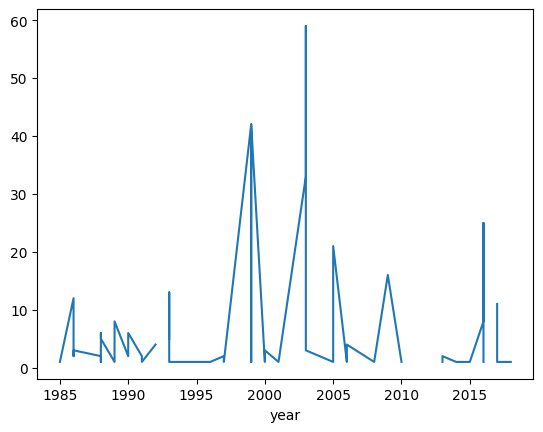

In [210]:
keanuN = cast[cast.name == "Keanu Reeves"].set_index('year').n.sort_index(ascending=True)
print(keanuN)
keanuN.plot(kind='line')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

1910    1
1911    1
1913    1
1921    1
1948    1
1954    1
1964    1
1969    1
1973    1
1976    1
1987    1
1990    1
1996    1
2000    1
2009    1
2011    1
2014    1
2015    1
2016    1
2017    1
Name: year, dtype: int64
1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    5
Name: year, dtype: int64


<AxesSubplot:>

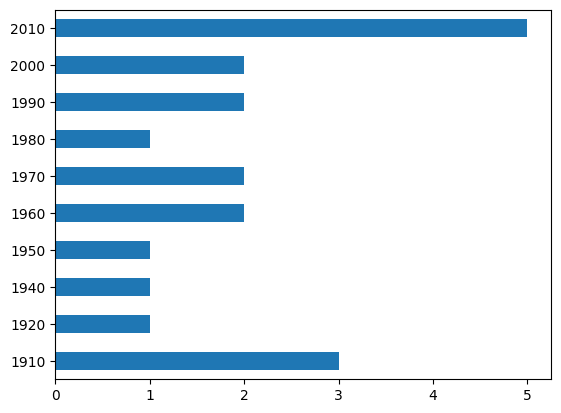

In [211]:
temp = movies[movies.title =='Hamlet'].year.value_counts().sort_index(ascending=True)
print(temp)

df = temp.groupby((temp.index//10)*10).sum()
print(df)
df.plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [213]:
cast[(cast.year >= 1960) & (cast.year < 1970)][pd.isnull(cast.n)].name.count()

/home/ubuntu/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


61033

In [ ]:
cast[(cast.year >= 2000) & (cast.year < 2009)][pd.isnull(cast.n)].name.count()

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [220]:
temp = cast[cast.name == "Frank Oz"].groupby('title').mean()[cast[cast.name=="Frank Oz"].groupby('title').count().type > 1].sort_values('year')
print(temp)

                                        year     n
title                                             
The Muppet Movie                      1979.0   2.0
An American Werewolf in London        1981.0  13.0
The Great Muppet Caper                1981.0   2.0
The Dark Crystal                      1982.0   3.0
The Muppets Take Manhattan            1984.0   2.0
Follow That Bird                      1985.0   3.0
The Muppet Christmas Carol            1992.0   5.0
Muppet Treasure Island                1996.0  14.0
Muppets from Space                    1999.0   7.0
The Adventures of Elmo in Grouchland  1999.0  16.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [226]:
cast = cast.loc[cast["name"] == "Frank Oz"]
cast2 = cast["character"].value_counts().reset_index(name = "Times")
cast2.loc[cast2["Times"] >= 2]

,index,Times
0,Miss Piggy,6
1,Yoda,6
2,Animal,6
3,Cookie Monster,5
4,Sam the Eagle,5
5,Fozzie Bear,4
6,Bert,3
7,Grover,2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

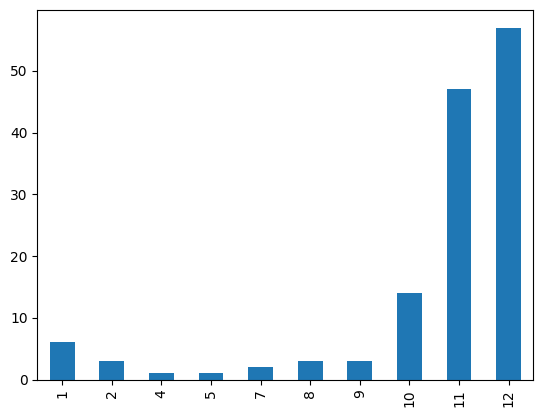

In [229]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

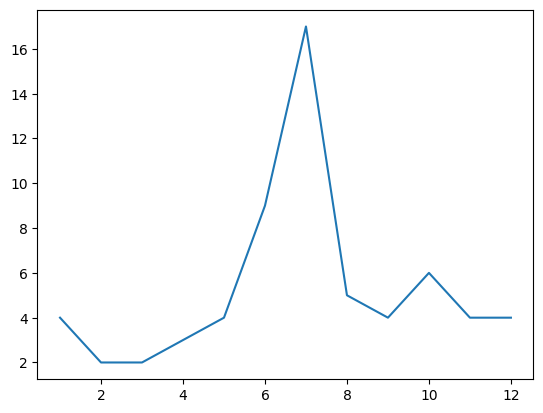

In [230]:
bar1 = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
bar1.date.dt.month.value_counts().sort_index().plot(kind='line')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

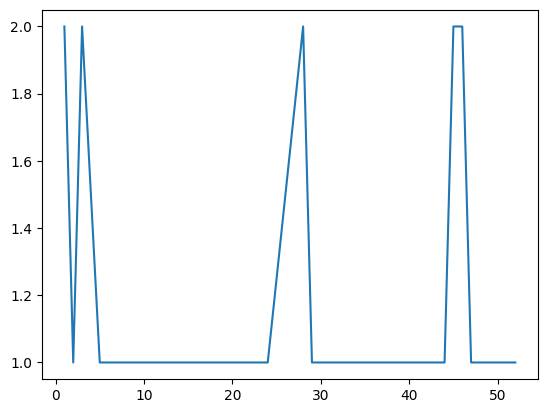

In [233]:
bar2 = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
bar2.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='line')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [242]:
keanu2 = keanu.merge(release_dates.loc[release_dates["country"] == "USA"], "left", ["title", "year"])
keanu2.loc[~pd.isnull(keanu2["n"])].sort_values("year")

,title,year,name,type,character,n,country,date
49,One Step Away,1985,Keanu Reeves,actor,Ron Petrie,1.0,NaN,NaT
29,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08
21,Flying,1986,Keanu Reeves,actor,Tommy Warneki,3.0,NaN,NaT
9,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0,USA,1986-01-31
16,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24
31,The Prince of Pennsylvania,1988,Keanu Reeves,actor,Rupert Marshetta,2.0,NaN,NaT
41,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
15,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22
12,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA,1989-05-26
33,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

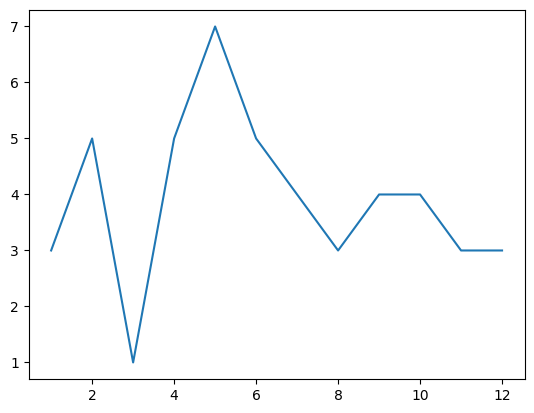

In [243]:
keanu2.date.dt.month.value_counts().sort_index().plot(kind='line')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

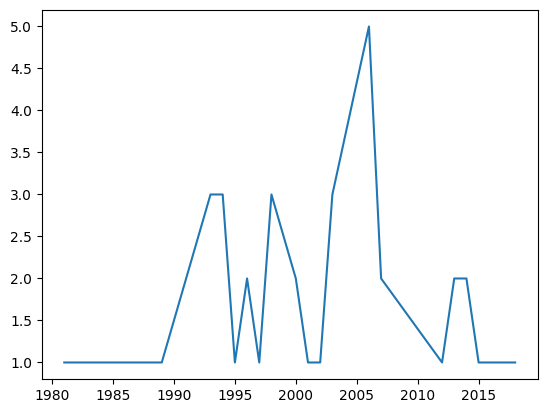

In [257]:
mckellen2 = mckell.merge(release_dates.loc[release_dates["country"] == "USA"], "left", ["title", "year"])
mckellen2.date.dt.year.value_counts().sort_index().plot(kind='line')